<a href="https://colab.research.google.com/github/pauliee99/Data-Mining/blob/main/CodeFileErgasias3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ΕΡΓΑΣΙΑ ΕΞΟΡΥΞΗΣ ΔΕΔΟΜΕΝΩΝ**

Αρχικά εισάγουμε κάποια βασικά imports τα οπία θα μας βοηθήσουν στην συνέχεια σε διάφορα να εισάγουμε και να τροποποιήσουμε τα δεδομένα μας.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ακολούθως εισάγουμε τα δεδομένα μας απο το google drive και διαβάζουμε το αρχείο companydata.csv σε ένα dataframe ώστε να μπορέσουμε να το επεξεργαστούμε στην συνέχεια.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folder='/content/drive/My Drive/7o eksamino/datamining/assignment'
!ls '/content/drive/My Drive/7o eksamino/datamining/assignment'
df = pd.read_csv(folder+'/companydata.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folder='/content/drive/My Drive/DataMining/Ergasia'
!ls '/content/drive/My Drive/DataMining/Ergasia'

df = pd.read_csv(folder+'/companydata.csv')

Mounted at /content/drive
CodeFileErgasias2.ipynb  companydata.csv     results.txt
CodeFileErgasias.ipynb	 companydata.gsheet  test_unlabeled.csv


Στη συνέχεια τυπώνουμε το dataframe με τα δεδομένα μας το οποίο έχει ως εξής.

In [ ]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X66,X63,X64,X65
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,0.249760,0.659800,0.166600,0.249760,497.42,0.733780,2.6349,0.249760,0.149420,43.3700,1.24790,0.214020,0.119980,0.477060,0.504940,0.604110,1.45820,1.761500,5.9443,0.117880,0.149420,94.140,3.8772,0.563930,0.214020,1.74100,593.27000,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.009700,1.52250,49.3940,0.185300,0.110850,2.04200,0.37854,0.257920,2.24370,2.24800,348690.0,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,0.261140,0.516800,0.158350,0.258340,677.96,0.538380,2.0005,0.258340,0.152000,87.9810,1.42930,0.248060,0.123040,NaN,0.395420,0.439920,88.44400,16.946000,3.6884,0.269690,0.152000,122.170,2.9876,2.987600,0.206160,1.69960,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.510450,1.12520,100.1300,0.237270,0.139610,1.94470,0.49988,0.334720,17.86600,17.86600,2304.6,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,0.312580,0.641840,0.244350,0.309060,794.16,0.459610,1.4369,0.309060,0.236100,73.1330,1.42830,0.302600,0.189960,NaN,0.289320,0.372820,86.01100,1.062700,4.3749,0.419290,0.238150,176.930,2.0630,1.427400,0.315650,1.30900,2.30190,0.51537,0.241140,0.322020,0.074020,0.231170,165.510,92.3810,0.948070,1.01010,96.3720,0.291810,0.222930,1.07580,0.48152,0.484740,1.20980,2.05040,6332.7,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,0.092704,0.301630,0.094257,0.092704,917.01,0.398030,3.2537,0.092704,0.071428,79.7880,1.50690,0.115500,0.062782,0.171930,0.573530,0.361520,0.94076,1.961800,4.6511,0.143430,0.071428,91.370,3.9948,0.375810,0.115500,1.35620,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.770,100.9800,0.287200,1.56960,84.3440,0.085874,0.066165,2.49280,0.30734,0.250330,2.45240,2.45240,20545.0,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,0.187320,0.331470,0.121820,0.187320,1133.20,0.322110,1.6307,0.187320,0.115530,57.0450,NaN,0.198320,0.115530,0.187320,0.386770,0.322110,1.41380,1.118400,4.1424,0.278840,0.115530,147.040,2.4823,0.323400,0.198320,1.62780,11.24700,0.43489,0.122310,0.293040,0.096680,0.122310,141.620,84.5740,0.739190,0.95787,65.9360,0.188110,0.116010,1.29590,0.56511,0.402850,1.88390,2.11840,3186.6,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,0.018371,0.052828,0.020881,0.018371,2041.50,0.178790,2.1093,0.018371,0.004526,4.9656,1.20480,0.032032,0.004526,0.018371,0.460840,0.178790,NaN,-0.172730,4.3025,0.093539,0.004526,31.645,11.5340,0.067565,0.032032,4.06500,1.23760,0.58717,0.007891,0.302270,0.158360,0.007891,9.572,4.6064,0.332650,0.44959,5.0255,-0.034360,-0.008464,0.44627,0.34776,0.086699,0.58450,0.74474,-2732.8,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,1
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,-0.015036,-0.047162,0.037092,-0.015036,4643.00,0.078613,1.7137,-0.015036,-0.012158,34.4360,1.17170,-0.008746,-0.010802,-0.015036,0.328470,0.081486,NaN

Εκτελώντας αυτά τα βήματα τα δεδομένα μας είναι έτοιμα για επεξεργασία.

**Preproccessing:**

Το πρώτο στάδιο της προεπεξεργασίας δεδομένων είναι να γεμίσουμε τα κενά τα οποία δέν έχουν συμπληροθεί για διάφορους λόγους, είτε ήταν μή υποχρεωτικά πεδία είτε λόγο σφάλματος του συστήματος είτε για όπιο δήποτε άλλο λόγο.  
Για την συμπλήρωση των κενών υπολογίζουμε το μέσο όρο τιμών του κάθε γνωρίσματος και με την συνάρτηση ```fillna()``` γεμίζουμε τα κενά με το μέσο όρο του γνωρίσματος στο οποίο ανήκει.

In [ ]:
col = df.columns.drop('X65')

for column in col:
  df[column] = df[column].fillna(int(df[column].mean()))

df.rename(columns={'X66': 'X62'}, inplace=True)

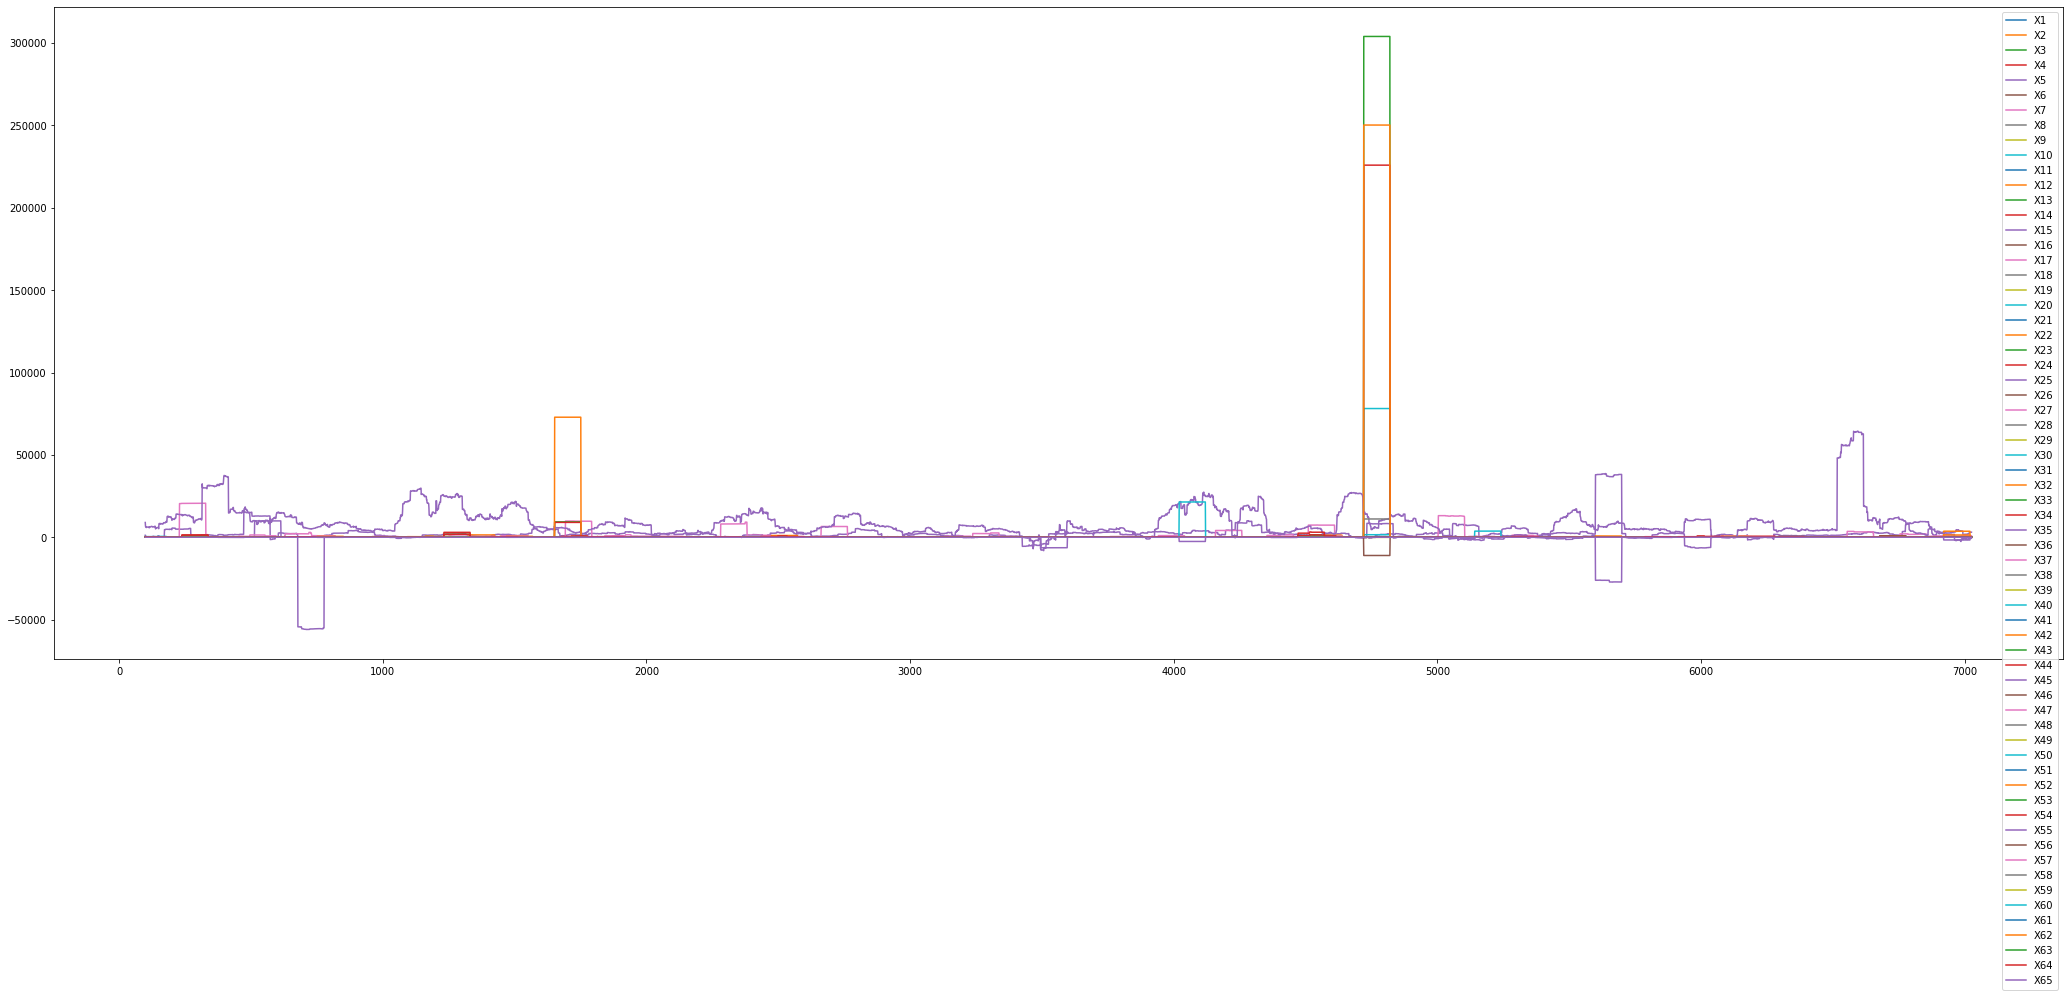

In [ ]:
df.rolling(100, win_type='gaussian').mean(std=df.std().mean()).plot(figsize=(36, 12))

**ΕΚΠΑΙΔΕΥΣΗ ΜΟΝΤΕΛΟΥ:**

Εκτελώντας την προεπεξεργασία ακολουθεί η εκπαίδευση του μοντέλου στην οποία χωρίζουμε το dataframe μας σε 2 μεταβητές Χ και y όπου η μία κρατάει τα δεδομένα και η άλλη το αποτέλεσμα για το αν τα χρεοκοπίσουν.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('X65',axis=1)

In [ ]:
y=df['X65']

Ακολούθως με την χρήση της μεθόδου train_test_split χορίζουμε τα δεδομένα μας σε 4 μεταβλητές που αποτελόυν δεδομένα εκπαίδευσης και δεδομένα ελένχου και η αναλογία 90% - 10%. Στη συνέχεια θέτουμε το τυχαίο random_state στο 42 και shuffle στο ```true```. Αυτή η διαδικάσία εκτελείται 100 φορές για cross validation ετσι ώστε να μαζέψουμε αρκετά μεγαλο κομάτι δεισματοληψείας

In [ ]:
#for i in range(10):
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42, shuffle=True, stratify=y)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42, shuffle=True)


6324 | 6324


0.9815078236130867

Με το επόμενο βήμα να είναι η κατηγοριοποίση, επιλέγουμε τον αλγόριθμο RandomForestClassifier διότι είναι ακριβής και αρκετά αξιόπιστος. Επίσης μας κάνει πολύ εύκολο το να ελένξουμε το overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Ο αλγόριθμος αποτελείται από ένα μεγάλο αριθμό μεμονωμένων δέντρων απόφασης που λειτουργούν ως σύνολο. Κάθε μεμονωμένο δέντρο στο τυχαίο δάσος βγάζει μια πρόβλεψη κλάσης και η τάξη με τις περισσότερες ψήφους γίνεται η πρόβλεψη του μοντέλου μας.  
Ο λόγος που αλγόριθμος είναι αποτελεσματικός είναι γιατί τα δέντρα αυτά "προστατέυουν" το ένα το άλλο ώστε αν ένα απο αυτά είναι λάθος τα υπόλυπα συνεχίζουν να κινούνται προς της σωστή κατεύθηνση με την προϋπόθεση πως τα δέντρα αυτά έχουν χαμηλή συσχέτηση.

In [ ]:

#for i in range(10):
model=RandomForestClassifier(criterion='gini', n_estimators=200, max_depth=None,min_samples_split=2, random_state=50, n_jobs=100)

#model=RandomForestClassifier(n_estimators=640, max_depth=None,min_samples_split=2, random_state=0)

Ολοκληρόνοντας την προεπεξεργασία χρησημοποιούμε την συνάρτηση ```fit()``` για να εκπαιδεύσουμε το μοντέλο με τις μεταβλητές εκπαίδευσης που διαχωρίσαμε παρά πάνω. 

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=50)

In [ ]:
model.score(X_test, y_test)

0.984352773826458

**ΤΕΛΙΚΗ ΠΡΟΒΛΕΨΗ:**

Για να ξεκινήσουμε την τελική πρόβλεψη πρέπει πρώτα να διαβάσουμε τα καινούρια δεδομένα σε ένα dataframe, τα οποία δέν έχουν το γνώρισμα πτώχευσης.

In [ ]:
test_data = pd.read_csv(folder+'/test_unlabeled.csv')

Ακολούθως επαναλαμβάουμε την διαδικασία συμπλήρωσης κενων, που κάναμε και παραπάνω, στο το καινούριο μας dataframe. 

In [ ]:
for column in col:
  test_data[column] = test_data[column].fillna(int(test_data[column].mean()))

test_data.rename(columns={'X66': 'X62'}, inplace=True)

In [ ]:
test_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
0,0.214080,0.363990,0.516280,10.42400,219.53000,0.346080,0.215990,1.73480,1.31250,0.63144,0.215990,3.942700,0.291020,0.215990,488.760,0.746780,2.7473,0.215990,0.231240,44.4790,1.33100,0.222710,0.229190,0.352140,0.63144,0.741540,3.12940,1.203600,5.3430,0.363950,0.231240,28.096,12.9910,0.611860,0.222710,0.93941,1.4787,0.94065,0.238440,0.485060,0.042961,0.238440,212.770,168.290,1.880800,8.34660,58.3780,0.166880,0.178660,1.56890,0.054781,0.076976,1.47210,2.19290,113740.0,0.238080,0.339030,0.76192,0.489690,8.2061,2.1689,21.407,17.0500,2.1776
1,-0.076930,0.473700,0.031616,1.08800,-68.27100,0.110650,-0.065768,0.74646,1.07160,0.35360,-0.065768,-0.183160,0.021692,-0.065768,7042.000,0.051832,2.1110,-0.065768,-0.058105,68.9010,0.98194,-0.040117,-0.067966,0.169250,0.35360,0.028270,-0.37982,0.051889,5.1987,0.404830,-0.058105,124.090,2.9414,-0.084689,-0.040117,1.15550,1.5445,0.46822,-0.035443,0.046253,0.310210,-0.035443,120.630,51.732,-0.360040,0.49301,73.8380,-0.130440,-0.115240,0.82478,0.359080,0.339970,0.58033,0.76845,4996.0,0.066855,-0.217560,0.93315,0.324150,5.2974,7.0556,115.790,3.1521,1.8577
2,0.010854,0.427760,0.508810,2.19050,31.26200,0.000000,0.011093,1.33770,1.59180,0.57224,0.027665,0.025956,0.014039,0.011093,6986.700,0.052242,2.3377,0.011093,0.006969,84.4260,1.16580,0.026396,0.006818,0.064145,0.56629,0.051682,1.59280,7.974000,3.9243,0.265860,0.009408,98.797,3.6944,3.691100,0.012898,1.59180,184.0000,0.57224,0.008103,0.021135,0.378710,0.016582,212.590,128.170,0.029478,1.32900,85.1160,0.015142,0.009512,2.18860,0.427380,0.270680,8.96800,8.96800,4274.1,0.008103,0.018967,0.99313,0.000000,4.3233,2.8478,97.997,3.7246,24.9470
3,-1.091000,0.029971,0.636780,22.24600,184.02000,-0.376920,-1.091000,32.36500,0.76382,0.97003,-1.091000,-36.400000,-13.206000,-1.091000,-10.027,-36.400000,33.3650,-1.091000,-13.206000,0.0000,0.87924,-0.028453,-13.206000,-0.376920,0.97003,-36.400000,-2.63070,1.910900,3.4748,-0.609050,-13.206000,101.150,3.6087,-0.949350,-0.028453,0.19192,184.0000,0.97003,-0.344420,22.081000,-0.034631,-0.344420,21.957,21.957,5.000000,22.24600,0.0000,-0.028453,-0.344420,22.24600,0.029971,0.277110,2.91090,2.91090,1900.3,-0.309210,-1.124700,1.30920,0.000000,56.0000,16.6240,132.420,2.7564,0.2479
4,0.294390,0.571270,0.068046,1.12020,0.49422,0.517280,0.294390,0.70034,1.15800,0.40008,0.294390,0.519960,0.156830,0.294390,628.220,0.581010,1.7505,0.294390,0.139100,8.2155,1.68680,0.290540,0.139100,0.517280,0.40008,0.581010,1.58980,0.186030,4.5604,0.108830,0.139100,113.080,3.2279,0.508600,0.290540,2.13150,115.3200,0.40517,0.137280,0.633890,0.057249,0.137280,47.485,39.270,6.180000,1.03600,9.5139,0.253020,0.119550,1.11020,0.566180,0.309800,1.09380,1.10770,2473.0,0.136470,0.735830,0.86353,0.012714,44.4280,9.2947,97.646,3.7380,5.7860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.048852,0.637190,-0.104900,0.80828,-50.04600,0.048852,0.063019,0.45916,1.01250,0.29257,0.063019,0.115180,0.067484,0.063019,1386.700,0.263220,1.5694,0.063019,0.025357,32.2900,1.03130,0.041378,0.019656,0.063019,0.29257,0.240980,478.00000,-0.188080,4.2702,0.242450,0.025357,81.361,4.4862,0.064939,0.041378,2.56360,2.4698,0.38261,0.016649,0.066787,0.143410,0.016649,59.583,27.293,0.222190,0.40644,32.6940,-0.063322,-0.025478,0.69406,0.547150,0.222910,0.52455,0.68598,-1954.1,0.012348,0.166980,0.98765,0.307760,11.3040,13.3730,80.356,4.5423,4.4559
3996,0.016778,0.868410,0.026588,1.03650,-23.43700,0.024877,0.016883,0.15153,1.02700,0.13159,0.016883,0.023164,0.020271,0.016883,7526.400,0.048496,1.1515,0.016883,0.008127,27.5200,1.1554

Τέλος με την συνάρτηση ```predict()``` προβλέπουμε τα δεδομένα μας με το προηγουμένως εκπαιδευμένο μοντέλο και τα αποθηκέυουμε σε έναν πίνακα με όνομα ```predictions``` αλλά και σε ένα αρχείο ```.txt```στο drive μας.

In [ ]:
predictions = model.predict(test_data) # data for predictions
np.savetxt(folder+'/results.txt', predictions, fmt='%d')
(predictions == 1).sum()

**ΕΠΙΠΛΕΩΝ ΜΕΘΟΔΟΙ ΠΟΥ ΔΟΚΟΙΜΑΣΑΜΕ**  
  
*   **Pearson's Correlation:**  
Αρχικά δημιουργήσαμε έναν πίνακα συσχετίσεων.  
```corr = df.corr(method='pearson').abs()```  
Ακολούθως αντικαθιστούμε τις τιμές του πίνακα με 1 στο πάνω μέρος του τριγώνου και το υπόλοιπο με 0. Ώστε να προσδιορίσουμε τις στίλες με τις μεγαλήτερες συσχετίσεις.  
```upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))```  
Στη συνέχεια κάνουμε drop τις στύλες που έχουν συσχέτηση μεγαλήτερη απο 95%.  
```to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]```  
```df.drop(to_drop, axis=1, inplace=True)```
  
  
*   **Normalization με MinMaxScaler:**  
```from sklearn import preprocessing```  
```scaler = preprocessing.MinMaxScaler()```  
```petalinfo = scaler.fit_transform(df)```  
```dfnorm = pd.DataFrame(petalinfo, columns = df.columns)```  
  

*   **Clustering με Kmeans:**  
```from sklearn.cluster import KMeans```  
```kmeans = KMeans(n_clusters=2, random_state=0).fit(dfnorm.drop(['X65'], axis=1))```  
```dfcluster = pd.DataFrame(kmeans.labels_, columns = ['cluster'])```

  

Επιπλέων δοκιμάσαμε πληθώρα άλλων συνδιασμών δέντρων και μεταβλητών τυχαιότητας στον RandomForestClassifier αλλά και διάφορους συνδυασμούς στο χωρισμό δεδομένων στον train_test_split και διάφορα μεγέθη επαναλήψεων και κρατήσαμε τις τιμές με την πιό ψιλή ακρίβεια με βάση τις προβλέψεις που επιτύχαμε στα δεδομένα μας όπως φαίνεται και παρακάτω. 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = model.predict(X_test) # data for model testing
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[675   1]
 [ 12  15]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       676
           1       0.94      0.56      0.70        27

    accuracy                           0.98       703
   macro avg       0.96      0.78      0.84       703
weighted avg       0.98      0.98      0.98       703

